In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [21]:
tre_market_share = 0.164
swedish_population = 10e6
urban_stockholm_population = 1e6
total_bandwidth = 139.6e6
lost_bandwidth = 10e6
lost_bandwidth_percent = lost_bandwidth/total_bandwidth

#-----------------------urban area (stockholm)
pop_per_km_sthlm = 5000
bytes_per_year = 686_814.887e12
bytes_per_year_2023 = 806_814.887e12
bytes_per_year_2025 = 1116_814.987e12
bytes_per_year_2026 = 1266_814.987e12
average_kbit_sec_busyhour = bytes_per_year_2026 * 8 / (365 * 8 * 60 * 60 * 1000)
average_kbit_sec_busyhour_per_person = average_kbit_sec_busyhour / swedish_population
kbit_sqrkm_sthlm = pop_per_km_sthlm * average_kbit_sec_busyhour_per_person

#rural area
pop_per_km_rural = 20
kbit_sqrkm_rural = pop_per_km_rural * average_kbit_sec_busyhour_per_person

#spectral efficiency
#https://www.gsma.com/spectrum/wp-content/uploads/2019/06/Benefits-of-Technology-Neutral-Spectrum-Licences.pdf
efficiency3g = 0.8
efficiency4g = 1.9
efficiency5g = 2.84
efficiency3g_4g_mix = (efficiency3g * 0.5) + (efficiency4g * 0.5)
efficiency4g_5g_mix = (efficiency4g * 0.5) + (efficiency5g * 0.5)

#----------Can moving from 3G to 4G/5G be sufficient in some cases? 
eight_hundred_band_percentage = 20e6/total_bandwidth
nine_hundred_band_percentage = 10e6/total_bandwidth
two_gig1_band_percentage = (19.8 * 2e6)/total_bandwidth
two_gig6_band_percentage = 70e6/total_bandwidth

tre_base_stations = tre_market_share * 43068
sthlm_area = 381 #km2
base_stations_sthlm = tre_base_stations * 0.1 #population 1million
network_capacity_sthlm = ((total_bandwidth - 19.8 * 2e6)/1e6 * efficiency4g_5g_mix * (base_stations_sthlm) *
                          1 / sthlm_area)
print('Network capacity STHLM (Mb/s)', network_capacity_sthlm)
print('User demand STHLM', kbit_sqrkm_sthlm/1000)

Network capacity STHLM (Mb/s) 439.36142362204725
User demand STHLM 482.0452766362253


0.8441149610686923


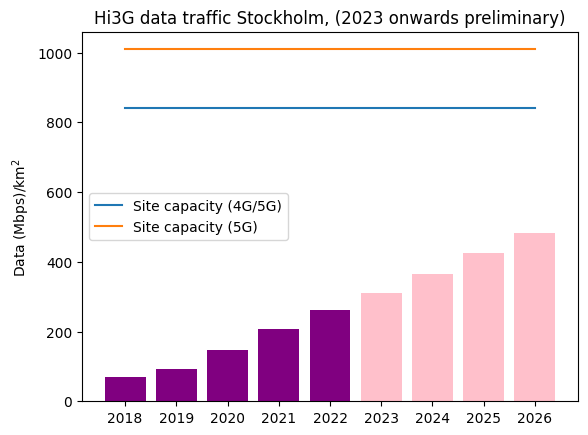

In [69]:
#network capacity STHLM
pop_per_km_sthlm = 5000
kbit_sqrkm_sthlm = pop_per_km_sthlm * average_kbit_sec_busyhour_per_person
cell_area_sthlm = 1.5 * np.sqrt(3) * 0.57**2 #km2
print(cell_area_sthlm)
sthlm_percentage = 0.1
per_second = 1/(365 * 8 * 60 * 60)
#base_stations_sthlm = tre_base_stations * sthlm_percentage #population 1million
network_capacity_sthlm = ((total_bandwidth - 39.6e6)/1e6 * efficiency4g_5g_mix *
                          3/cell_area_sthlm)

network_capacity_sthlm5G = ((total_bandwidth - 39.6e6)/1e6 * efficiency5g *
                          3/cell_area_sthlm)

tre_pop = swedish_population * tre_market_share
#data TRE 
#https://statistik.pts.se/VariableValue/VariableValuesResult/2294?tableName=Tabell%2015%20Mobila%20datatj%C3%A4nster&&subHeader=Mobila%20samtals-%20och%20datatj%C3%A4nster%20-%20mobila%20datatj%C3%A4nster%20[8][10]*
data_usage_sthlm = [1266_814.987,1116_814.987, 956_814.887,816_814.887,686_814.887, 541_691.417, 389_994.516, 245_134.305, 185_363.234]
plt.xticks(np.arange(9), ["2018", "2019","2020", "2021", "2022", "2023", "2024", "2025", "2026"])
for i in range(0, len(data_usage_sthlm)):
    if i < 5:
            plt.bar(i, pop_per_km_sthlm/(swedish_population) * 8e6 * per_second  * data_usage_sthlm[-i-1], color='purple')
    else:
            plt.bar(i, pop_per_km_sthlm/(swedish_population) * 8e6 * per_second  * data_usage_sthlm[-i-1], color='pink')
plt.title('Hi3G data traffic Stockholm, (2023 onwards preliminary)')
plt.plot(np.arange(9), [network_capacity_sthlm for x in np.arange(9)], label='Site capacity (4G/5G)')
plt.plot(np.arange(9), [network_capacity_sthlm5G for x in np.arange(9)], label='Site capacity (5G)')
plt.ylabel('Data (Mbps)/km$^2$')
plt.legend()

In [77]:
1/1.273 + 0.399

1.1845459544383348

In [71]:
1/0.844

1.1848341232227488

In [89]:
381/1.273

299.29300864100554

In [85]:
stations_in_sthlm = 8378 * tre_market_share
print(stations_in_sthlm)

1373.992


In [92]:
152*110e4

167200000.0